In [1]:
import os,sys
import numpy as np
from tmd import TMD
import pylab as py

## Load the TMD class

In [2]:
tag='020820'
tmd=TMD(tag)

020820 is a tag for a given analysis. See  ...

## Simple test

In [3]:
x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','transversity',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','transversity',0,icol=True))

[ 1.34068022e+00  2.67657495e+00  0.00000000e+00 -1.13986894e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.34068022e+00
  1.34068022e+00  1.34068022e+00  1.34068022e+00]
[ 6.42582127e-01  1.40267663e+00  0.00000000e+00 -5.97355781e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.42582127e-01
  6.42582127e-01  6.42582127e-01  6.42582127e-01]


- icol=False will give the full TMD

- icol=True  will return only the collinear part

- 0 means the replica index. You can get the number of replicas via  


In [4]:
tmd.nrep

953

## Transversity

Generate the data

In [5]:
X=np.linspace(0.01,0.99,100)
Q2=10.0
kT=0.0
nrep=50  #--lets use a subset of the replicas
tran=np.array([[tmd.eval(x,Q2,kT,'p','transversity',irep,icol=True) for x in X] for irep in range(nrep)])
print(tran.shape)

(50, 100, 11)


- This is 10 replicas, 100 x values and 11 partons

- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [6]:
u_rep=tran[:,:,1]
d_rep=tran[:,:,3]

u  = np.mean(u_rep,axis=0)
du = np.std(u_rep,axis=0)
d  = np.mean(d_rep,axis=0)
dd = np.std(d_rep,axis=0)


Text(0.5,0,'$x$')

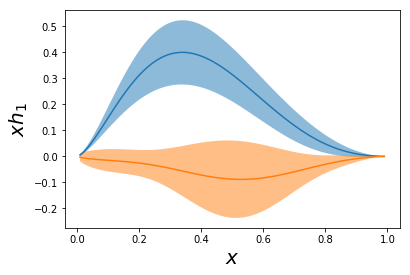

In [7]:
ax=py.subplot(111)
ax.fill_between(X,X*(u-du),X*(u+du),alpha=0.5)
ax.fill_between(X,X*(d-dd),X*(d+dd),alpha=0.5)

ax.plot(X,X*u)
ax.plot(X,X*d)

ax.set_ylabel(r'$xh_1$',size=20)
ax.set_xlabel(r'$x$',size=20)
